In [15]:

%matplotlib inline
from plot_utils import get_online_training_info, plot_mean_var_line, smooth
import numpy as np

smoothness = 100

model_stats = {}
for seed in [13,17,19,23,29]:
#     expe = f"OfflineAgentWithOnlineTest_PointwiseRanker_actor0.0001_pos0.4_neg0.1_niter6000_reg0.0001_ep0.05_bs128_epbs128_seed{seed}"
#     expe = f"OfflineAgentWithOnlineTest_SlateGFN_DB_R1.0_F0.8_Z0_actor0.0001_niter10000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#     expe = f"OfflineAgentWithOnlineTest_SlateGFN_TB_R1.0_F0.8_Z1.5_actor0_niter6000_reg0.0001_ep0.05_bs128_epbs128_seed{seed}"
#     expe = f"OfflineRerankAgentWithOnlineTest_ListCVAE_beta1.0_rt2.0_actor0.00001_niter10000_reg0.0001_ep0.05_bs128_epbs128_seed{seed}"
#     expe = f"OfflineRerankAgentWithOnlineTest_PRM_actor0.0001_init1.0_pv0.1_c50_niter10000_reg0_ep0.05_seed{seed}"
#     expe = f"OfflineRerankAgentWithOnlineTest_TwoStageOnlinePolicy_actor0.0001_niter10000_reg0_ep0.1_bs128_epbs128_seed{seed}"
#     log_path = "output/ml1m/agent/" + expe  + "/model_offline_test.report"

#     expe = f"OfflineAgentWithOnlineTest_PointwiseRanker_actor0.0001_pos0.4_neg0.1_niter10000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#     expe = f"OfflineAgentWithOnlineTest_ListCVAE_beta1.0_rt2.5_actor0.00001_niter5000_reg0.0001_ep0.05_bs128_epbs128_seed{seed}"
#     expe = f"OfflineAgentWithOnlineTest_SlateGFN_DB_R0.4_F0.3_Z1.0_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#     expe = f"OfflineAgentWithOnlineTest_SlateGFN_TB_R0.1_F1.0_Z1.0_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#     expe = f"OfflineRerankAgentWithOnlineTest_PRM_actor0.0001_init0.01_pv0.1_c50_niter5000_reg0_ep0.05_seed{seed}"
    expe = f"OfflineRerankAgentWithOnlineTest_TwoStageOnlinePolicy_actor0.0001_niter5000_reg0_ep0.1_bs128_epbs128_seed{seed}"

    log_path = "output/kuairand_1k/agent/" + expe  + "/model_offline_test.report"
    with open(log_path, 'r') as infile:
        info = infile.readline()
        info = eval(info)
#         print(info)
        for k,v in info.items():
            if k not in model_stats:
                model_stats[k] = [v]
            else:
                model_stats[k].append(v)
print('\t'.join(list(model_stats.keys())))
print('\t'.join([str(np.mean(v)) for _,v in model_stats.items()]))
        


NDCG	MRR	NDCG_0	NDCG_1	NDCG_2	NDCG_3	NDCG_4	NDCG_5	MRR_0	MRR_1	MRR_2	MRR_3	MRR_4	MRR_5
0.33871769089147774	0.041450179806755236	0.3651716493975073	0.3226815610398262	0.3177533044246957	0.33734012138302205	0.34311670671486355	0.34624280238895155	0.04275909255957231	0.041817335283849386	0.04075158670311794	0.0413196787587367	0.04130073528503999	0.040752650250215086


In [ ]:
example_experiments = {
    'ml1m': {
        'CF': "OfflineAgentWithOnlineTest_PointwiseRanker_actor0.0001_pos0.4_neg0.1_niter6000_reg0.0001_ep0.05_bs128_epbs128_seed23",
        'SlateGFN_DB': "OfflineAgentWithOnlineTest_SlateGFN_DB_R1.0_F0.8_Z0_actor0.0001_niter10000_reg0_ep0.05_bs128_epbs128_seed11",
        'SlateGFN_TB': "OfflineAgentWithOnlineTest_SlateGFN_TB_R1.0_F0.8_Z1.5_actor0.0001_niter6000_reg0.0001_ep0.05_bs128_epbs128_seed11",
        "PRM": "OfflineRerankAgentWithOnlineTest_PRM_actor0.0001_init1.0_pv0.1_c50_niter10000_reg0_ep0.05_seed13"
    },
    'kuairand_1k': {
        'CF': "OfflineAgentWithOnlineTest_PointwiseRanker_actor0.0001_pos0.4_neg0.1_niter10000_reg0_ep0.05_bs128_epbs128_seed11",
        'ListCVAE': "OfflineAgentWithOnlineTest_ListCVAE_beta1.0_rt3.0_actor0.0001_niter5000_reg0.0001_ep0.05_bs128_epbs128_seed19",
        'SlateGFN_TB': "OfflineAgentWithOnlineTest_SlateGFN_TB_R0.1_F1.0_Z1.0_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed23",
        'SlateGFN_DB': "OfflineAgentWithOnlineTest_SlateGFN_DB_R0.4_F0.3_Z1.0_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed11",
        'RerankTopK': "OfflineRerankAgentWithOnlineTest_TwoStageOnlinePolicy_actor0.0001_niter5000_reg0_ep0.1_bs128_epbs128_seed13"
    }
}

model_loss_observation = {
    'CF': ['loss', 'R_loss'],
    'SlateGFN_DB': ['loss', 'DB_loss', 'terminal_loss', 'forward_part', 'backward_part', 'prob'],
    'SlateGFN_TB': ['loss', 'TB_loss'],
    'ListCVAE': ['loss', 'rec_loss', 'KLD'],
    'PRM': ['loss', 'initial_loss', 'rerank_loss', 'pv_loss'],
    'RerankTopK': ['loss', 'initial_loss', 'rerank_loss']
}

299it [00:00, 11379.16it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	NDCG	MRR	is_click_rate	is_like_rate	is_star_rate	NDCG_0	NDCG_1	NDCG_2	NDCG_3	NDCG_4	NDCG_5	MRR_0	MRR_1	MRR_2	MRR_3	MRR_4	MRR_5	loss	TB_loss
5980.0	2.0419922709465026	2.9666666984558105	0.24905821904540063	18.45	0.5781596094369889	0.6326721544687947	0.08488712509473166	0.7444661617279053	0.6829427242279053	0.6145833522081375	0.6416280806064606	0.6458910256624222	0.6760134696960449	0.6430596679449081	0.6896286822855473	0.4998120006173849	0.08679886870086193	0.08738289326429367	0.08898059614002704	0.0864657748490572	0.08627814836800099	0.07341646924614906	0.03861908176913857	0.03861908176913857
299	299	299	299	299	299	299	299	299	299	299	299	299	299	299	299	299	299	299	299	299	299	299	299	299


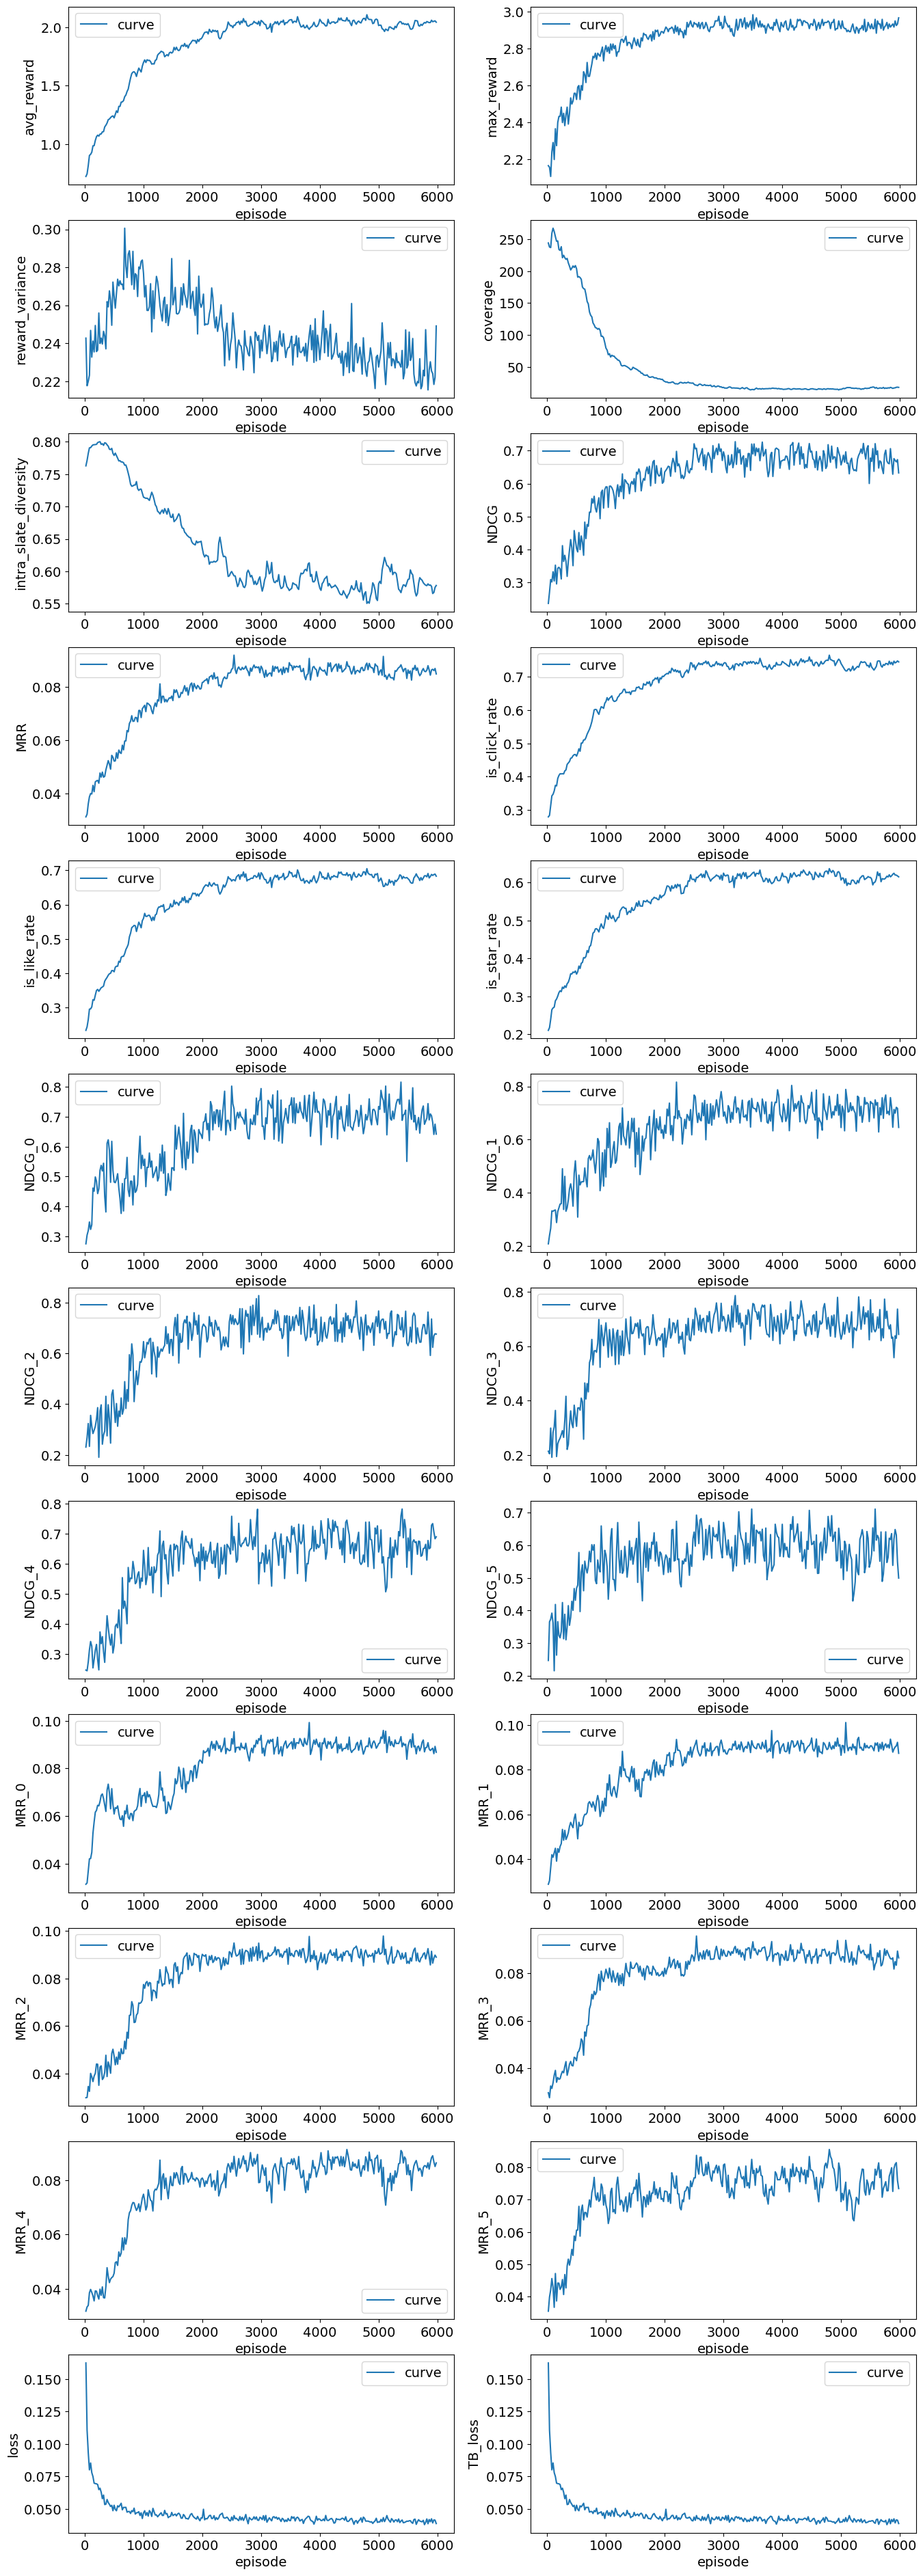

In [20]:
%matplotlib inline
from plot_utils import get_online_training_info, multiplot_multiple_lines, smooth
import numpy as np

smoothness = 1

data_key = 'ml1m'
# data_key = 'kuairand_1k'

model_key = 'SlateGFN_TB'


expe = example_experiments[data_key][model_key]

log_path = "output/" + data_key + "/agent/" + expe  + "/model.report"
info = get_online_training_info(log_path, training_losses = model_loss_observation[model_key])

for k in list(info.keys()):
    v = info[k]
    info[k] = smooth(np.array(v), smoothness)
    
print('\t'.join([k for k,v in info.items()]))
print('\t'.join([str(v[-1]) for k,v in info.items()]))
print('\t'.join([str(len(v)) for k,v in info.items()]))
multiplot_multiple_lines(["curve"], [info], 'episode')

In [3]:

model_loss_observation = {
    'CF': ['loss', 'R_loss'],
    'SlateGFN_DB': ['loss', 'DB_loss', 'terminal_loss', 'forward_part', 'backward_part', 'prob'],
    'SlateGFN_TB': ['loss', 'TB_loss'],
    'ListCVAE': ['loss', 'rec_loss', 'KLD'],
    'PRM': ['loss', 'initial_loss', 'rerank_loss', 'pv_loss'],
    'RerankTopK': ['loss', 'initial_loss', 'rerank_loss']
}

0.1,seed(11)


499it [00:00, 11522.24it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	NDCG	MRR	is_click_rate	is_like_rate	is_star_rate	NDCG_0	NDCG_1	NDCG_2	NDCG_3	NDCG_4	NDCG_5	MRR_0	MRR_1	MRR_2	MRR_3	MRR_4	MRR_5	loss	initial_loss	rerank_loss
9480.0	1.874568598060047	2.914379162180657	0.3439169861668464	137.64411764705883	0.6273133939679931	0.6244615602147237	0.07952695823049331	0.6861902771042842	0.6245379078037598	0.563840400296099	0.6553958531542151	0.6366561169863916	0.62049827822758	0.6205549458918326	0.6138363900293103	0.5998277769990119	0.08289099998187785	0.08080325326425772	0.07965678755266994	0.0787745012883462	0.07805591718677213	0.07698029010903602	0.09960881722908392	0.09960881722908392	0.0
0.1,seed(13)


499it [00:00, 11483.74it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	NDCG	MRR	is_click_rate	is_like_rate	is_star_rate	NDCG_0	NDCG_1	NDCG_2	NDCG_3	NDCG_4	NDCG_5	MRR_0	MRR_1	MRR_2	MRR_3	MRR_4	MRR_5	loss	initial_loss	rerank_loss
9480.0	1.8967627333659756	2.9150327558610956	0.3136493893522842	122.38529411764705	0.6158857034994106	0.6270052425343059	0.08032122912810616	0.69534188070718	0.6320861621230257	0.5693346809814958	0.6371847987941959	0.626563897148213	0.6194136132650515	0.6355688509549581	0.6217767325497013	0.6215235624937159	0.08158651321176803	0.0806683068254999	0.08016588785776904	0.0805689799252386	0.07984748498043594	0.07909020196792542	0.09983853399023121	0.09983853399023121	0.0
0.1,seed(17)


499it [00:00, 11441.99it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	NDCG	MRR	is_click_rate	is_like_rate	is_star_rate	NDCG_0	NDCG_1	NDCG_2	NDCG_3	NDCG_4	NDCG_5	MRR_0	MRR_1	MRR_2	MRR_3	MRR_4	MRR_5	loss	initial_loss	rerank_loss
9480.0	1.8890932087804755	2.919117719753116	0.30902720359610575	135.23137254901962	0.6400863885295158	0.6315533071102002	0.08016826692372073	0.6902050334448908	0.6296364584974213	0.5692517048003627	0.6620980036353655	0.6517802571512613	0.6274864572702962	0.6224904381779625	0.6140877566282071	0.6113769297981086	0.08425869065172532	0.0821390507377538	0.07969377358608386	0.07913283201336277	0.07810086145193554	0.07768439310146313	0.1000989897140101	0.1000989897140101	0.0
0.1,seed(19)


499it [00:00, 11445.31it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	NDCG	MRR	is_click_rate	is_like_rate	is_star_rate	NDCG_0	NDCG_1	NDCG_2	NDCG_3	NDCG_4	NDCG_5	MRR_0	MRR_1	MRR_2	MRR_3	MRR_4	MRR_5	loss	initial_loss	rerank_loss
9480.0	1.9875945418488747	2.931209214528402	0.27549857241558096	107.12352941176471	0.604477747632008	0.6620125356215519	0.08428690120930865	0.7231094449758529	0.6641531546910604	0.6003319226059258	0.6818662139787977	0.6735761408931483	0.6622641234019516	0.6582915267560119	0.6503965762498625	0.6456806324495404	0.08707013293078134	0.08557974984686749	0.08444736851196662	0.08378863760872798	0.08285706824093474	0.0819784501165736	0.09946341351697256	0.09946341351697256	0.0
0.1,seed(23)


499it [00:00, 11403.90it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	NDCG	MRR	is_click_rate	is_like_rate	is_star_rate	NDCG_0	NDCG_1	NDCG_2	NDCG_3	NDCG_4	NDCG_5	MRR_0	MRR_1	MRR_2	MRR_3	MRR_4	MRR_5	loss	initial_loss	rerank_loss
9480.0	1.857435987743677	2.9094772032662934	0.33286386263721135	146.73137254901962	0.6493051811176188	0.6160201533501237	0.07868675865975566	0.6811670444759668	0.6191700051228206	0.5570989270420635	0.6433587133665296	0.6273262892101034	0.6025621598476875	0.6150096395180799	0.6016304660433284	0.6062336521150142	0.08228490534147212	0.07979917514557933	0.07755943513384053	0.07818957486865567	0.07725109297270868	0.07703636849627775	0.09945734636310269	0.09945734636310269	0.0


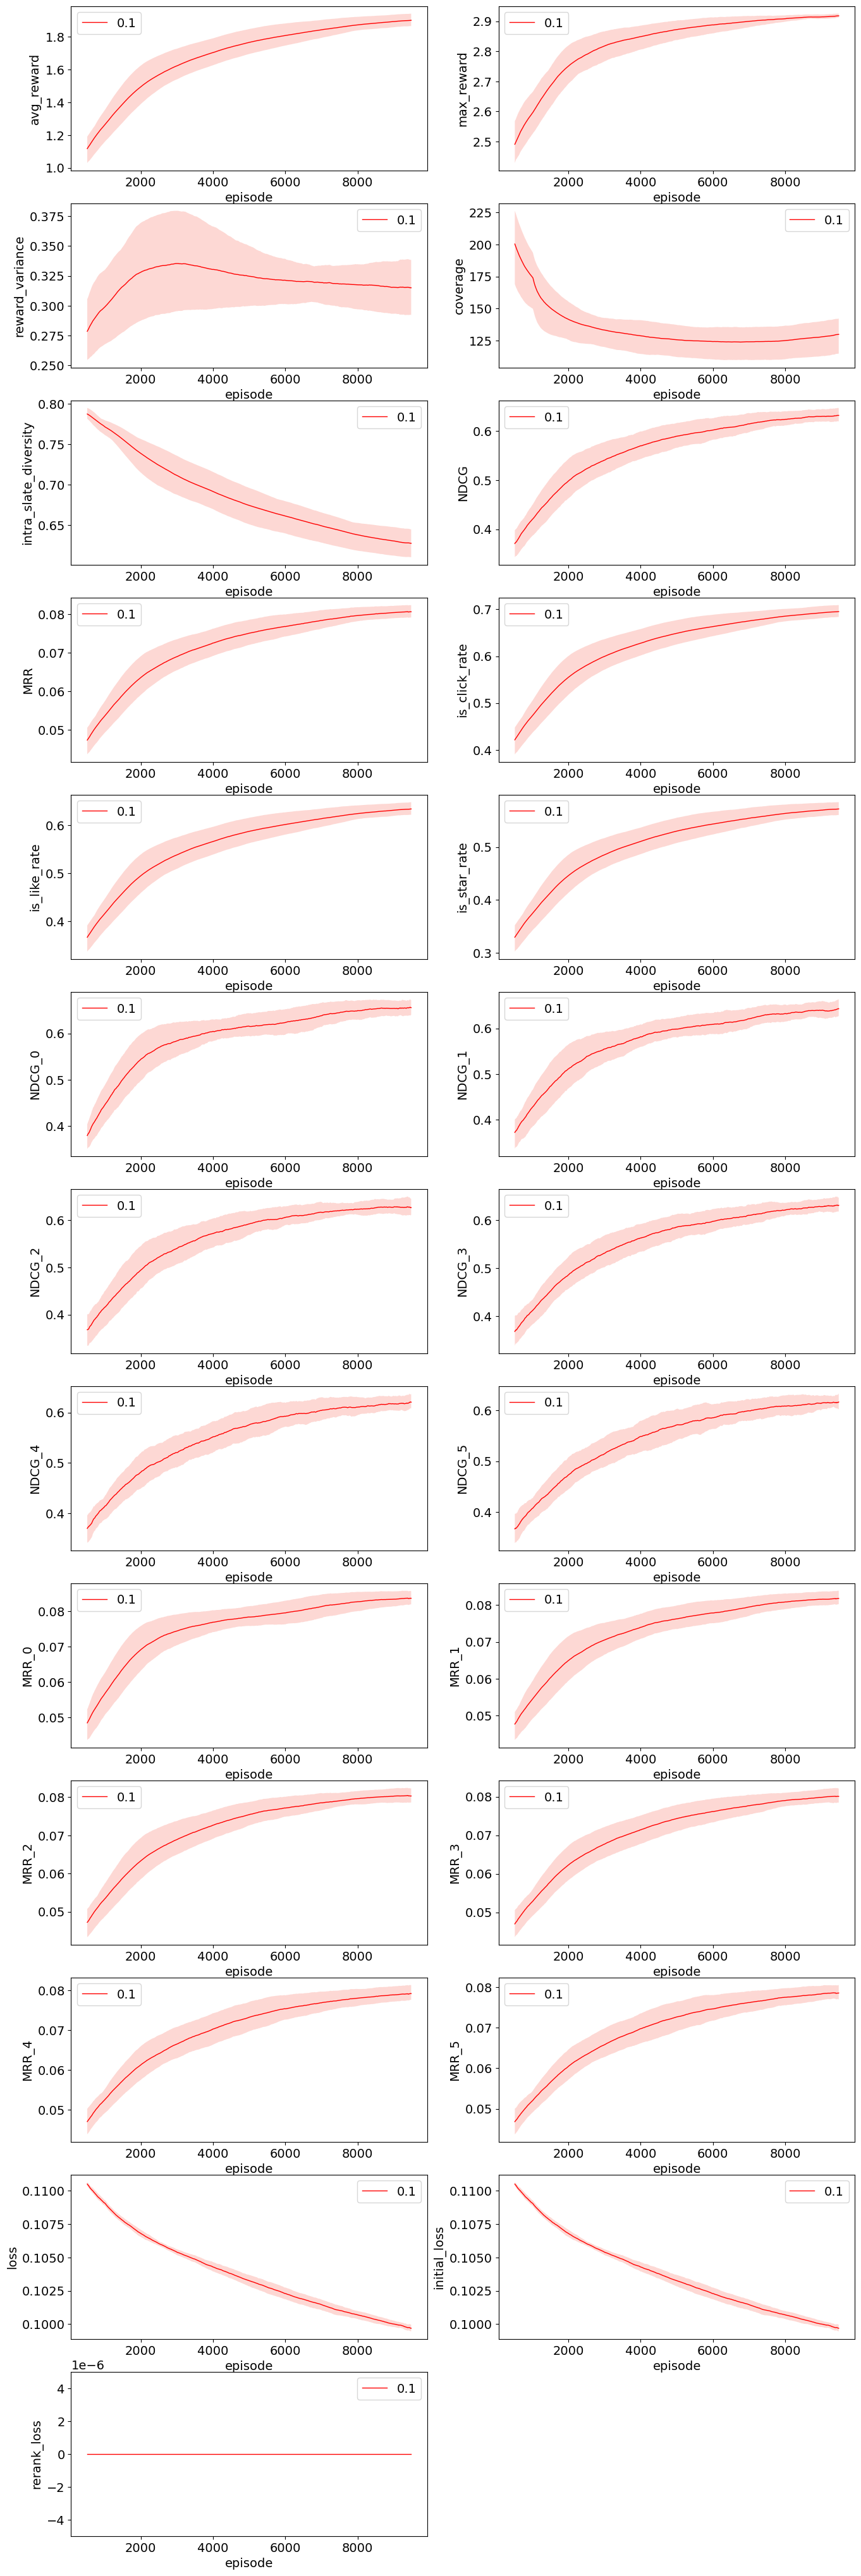

In [4]:

%matplotlib inline
from plot_utils import get_online_training_info, plot_mean_var_line, smooth
import numpy as np

smoothness = 100

data_key = 'ml1m'
# data_key = 'kuairand_1k'
REG = "0.0001"
N_ITER = '5000'
# L = ['0.001', '0.0001', '0.00001']
# L = ['0.01', '0.1', '0.4', '1.0', '1.4']
L = ['0.1']
stats = []
for l in L:
    model_stats = []
    for seed in [11,13,17,19,23]: # 11,13,17,19,23,29
        print(f"{l},seed({seed})")
#         expe = f"OfflineRerankAgentWithOnlineTest_PRM_actor0.0001_init1.0_pv0.1_c50_niter10000_reg0_ep0.05_seed{seed}"
#         expe = f"OfflineAgentWithOnlineTest_SlateGFN_DB_R1.0_F0.8_Z0_actor0.0001_niter10000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#         expe = f"OfflineRerankAgentWithOnlineTest_ListCVAE_beta1.0_rt2.5_actor0.00001_niter10000_reg0.0001_ep0.05_bs128_epbs128_seed{seed}"
        expe = f"OfflineRerankAgentWithOnlineTest_TwoStageOnlinePolicy_actor0.0001_niter10000_reg0_ep0.1_bs128_epbs128_seed{seed}"

        log_path = "output/" + data_key + "/agent/" + expe  + "/model.report"

        info = get_online_training_info(log_path, training_losses = model_loss_observation['RerankTopK'])
        for k in list(info.keys()):
            v = info[k]
            info[k] = smooth(np.array(v), smoothness)
        model_stats.append(info)
        print('\t'.join([k for k,v in info.items()]))
        print('\t'.join([str(v[-1]) for k,v in info.items()]))
    stats.append(model_stats)
plot_mean_var_line(L, stats, "episode",  ncol = 2, row_height = 4, window = None)
